In [275]:
import os
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

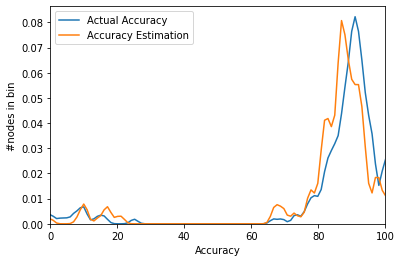

In [276]:
nodes=[x for x in glob.glob('NodeFinals/NodeAcc/**')]
nodeAcc=dict()
for node in nodes:
    with open(node,'r', encoding='utf-8') as f:
        nodeAcc[int(node.split('/')[2])]=float(f.readline())
nodes=[x for x in glob.glob('RSUFinals/NodeAcc/**')]
RSUNodeAcc=dict()
for node in nodes:
    with open(node,'r', encoding='utf-8') as f:
        RSUNodeAcc[int(node.split('/')[2])]=float(f.readline())
#nodeAcc={i[0]:i[1] for i in sorted(nodeAcc.items(), key = lambda kv:(kv[1], kv[0]))}
plt.figure()
plt.xlim(0, 100)
plt.xlabel("Accuracy")
plt.ylabel("#nodes in bin")
#sns.distplot([nodeAcc[i] for i in nodeAcc],bins=15, label='Actual Accuracy')
#sns.distplot([RSUNodeAcc[i] for i in RSUNodeAcc], bins=15, label='Accuracy Estimation')
sns.kdeplot([nodeAcc[i]*100 for i in nodeAcc], bw=.05, label='Actual Accuracy')
sns.kdeplot([RSUNodeAcc[i]*100 for i in RSUNodeAcc], bw=.05, label='Accuracy Estimation')
plt.legend()
plt.savefig("/home/rohan/veins-5.0/examples/myProj1/plots/PrimaryScoreComparitiveHistogram.svg")


Nodes evaluated:	202/206	(98.06% of Total Nodes)
_________________________________________________
|			#nodes	%nodes (of those|
|				 Evaluated)	|
-------------------------------------------------
| Less than 0.01 error:	38	18.8%		|
| Less than 0.05 error:	167	82.7%		|
| Less than 0.1 error:	192	95.0%		|
| Less than 0.15 error:	196	97.0%		|
| Less than 0.2 error:	199	98.5%		|
| Less than 0.25 error:	201	99.5%		|
| Less than 0.3 error:	201	99.5%		|
| Less than 0.35 error:	202	100.0%		|
-------------------------------------------------


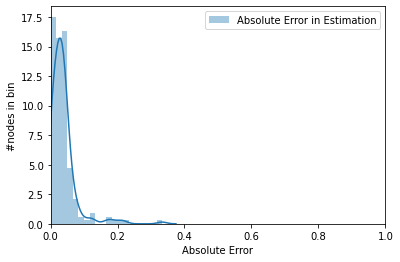

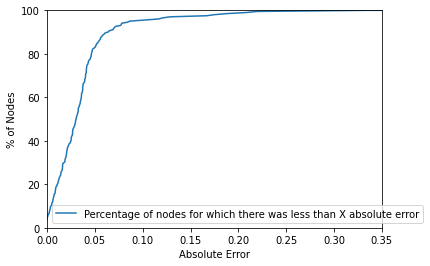

In [277]:
errors=[]
noEval=0
lessThan={0.01:0,0.05:0,0.10:0,0.15:0,0.20:0,0.25:0,0.30:0,0.35:0}

for i in nodeAcc.keys():
    if i in RSUNodeAcc.keys():
        error=abs(RSUNodeAcc[i]-nodeAcc[i])
        errors.append(error)
        for i in lessThan.keys():
            if error<=i:
                lessThan[i]+=1
    else:
        noEval+=1  
prcOfErrorsLessThan=dict()
ct=0
for i in sorted(errors):
    ct+=1
    p=100*float(ct)/float(len(nodeAcc)-noEval)
    prcOfErrorsLessThan[i]=p
prcOfErrorsLessThan[1]=100

plt.figure()
plt.xlim(0, 1)
plt.xlabel("Absolute Error")
plt.ylabel("#nodes in bin")
sns.distplot(errors,  bins=20, label='Absolute Error in Estimation')
plt.legend()
plt.savefig("/home/rohan/veins-5.0/examples/myProj1/plots/AbsoluteErrorInEstimation.svg")

plt.figure()
plt.xlim(0, 0.35)
plt.ylim(0, 100)
plt.xlabel("Absolute Error")
plt.ylabel("% of Nodes")
plt.plot([float(i) for i in prcOfErrorsLessThan.keys()],[float(i) for i in prcOfErrorsLessThan.values()], label="Percentage of nodes for which there was less than X absolute error")
plt.legend()
plt.savefig("/home/rohan/veins-5.0/examples/myProj1/plots/CommulativeAbsoluteErrorInEstimation.svg")

print("Nodes evaluated:\t"+str(len(nodeAcc)-noEval)+"/"+str(len(nodeAcc))+"\t("+str(round(float(len(nodeAcc)-noEval)*100/float(len(nodeAcc)),2))+"% of Total Nodes)")
print("_"*49)
print("|\t\t\t#nodes\t%nodes (of those|\n|\t\t\t\t Evaluated)\t|")
print("-"*49)
for i in lessThan.keys():
    print("| Less than "+str(i)+" error:\t"+str(lessThan[i])+"\t"+str(round(float(lessThan[i])*100/float(len(nodeAcc)-noEval),1))+"%\t\t|")      
print("-"*49)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


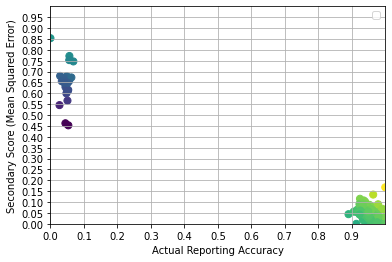

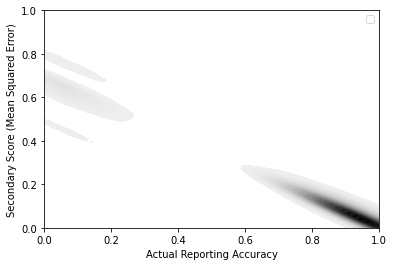

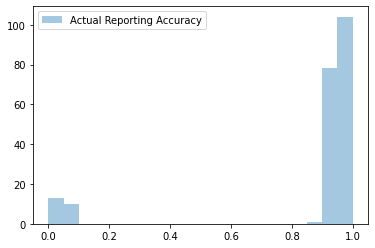

In [312]:
nodes=[x for x in glob.glob('NodeFinals/NodeRepAcc/**')]
nodeAcc=dict()
for node in nodes:
    with open(node,'r', encoding='utf-8') as f:
        nodeAcc[int(node.split('/')[2])]=float(f.readline())
nodes=[x for x in glob.glob('RSUFinals/NodeSecScore/**')]
RSUNodeSSs=dict()
for node in nodes:
    with open(node,'r', encoding='utf-8') as f:
        SSs=f.readlines()
        RSUNodeSSs[int(node.split('/')[2])]=[float(i) for i in SSs]

a=[]
b=[]
noEval=0
for i in nodeAcc.keys():
    if i in RSUNodeSSs.keys():
        a.append(nodeAcc[i])
        b.append(sum(RSUNodeSSs[i])/len(RSUNodeSSs[i]))
    else:
        noEval+=1
        
fig=plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 1, 0.1))
ax.set_yticks(numpy.arange(0, 1, 0.05))
plt.grid(b=True,which='both',axis='both')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Actual Reporting Accuracy")
plt.ylabel("Secondary Score (Mean Squared Error)")
#plt.scatter(a,b,s=50,c=np.random.randint(0, 50, len(a)), alpha=1)
plt.scatter(a,b,s=50,c=[((i+j)*1000) for i,j in zip(a,b)], alpha=1)
plt.legend()
plt.savefig('/home/rohan/veins-5.0/examples/myProj1/plots/ReportingAccuracy_Vs_SecondaryScore.svg')
plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Actual Reporting Accuracy")
plt.ylabel("Secondary Score (Mean Squared Error)")
sns.kdeplot(a,b,n_levels=100, shade=True, shade_lowest=False, color='black')
plt.legend() 
plt.savefig('/home/rohan/veins-5.0/examples/myProj1/plots/ReportingAccuracy_Vs_SecondaryScorea_bivariateKDE.svg')



plt.figure()
sns.distplot([nodeAcc[i] for i in nodeAcc], kde=False, bins=20, label='Actual Reporting Accuracy')
plt.legend()




In [248]:
a=85.43535345345345345345
round(a,2)

85.44

In [206]:
a=[1,2,3,4]
#b=[9 for i in range(0,len(a))]
b=[9]*len(a)
c=[]
d=[]
for a,b in zip(a,b):
    c.append(a)
    d.append(b)
print(c)
print(d)

[1, 2, 3, 4]
[9, 9, 9, 9]
